Lista de cosas por hacer:
- [ ] Más análisis
    - [x] Riqueza léxica
    - [x] Que palabras prefieren
    - [ ] Longitud media de frases
    - [x] Longitud media de palabras
    - [x] De todos los textos leidos, que palabras aparecen más, cuáles menos y en que tipo son más frecuentes.
- [x] Dividir dataset en 60/20/20 variados
- [X] Entrenarlo y evaluar su capacidad de deteccion

Comienzo de la práctica

# AI vx Human 

## Index

1. [Data pre-processing](#data-pre-processing-and-required-imports)
2. [Lexical richness](#lexical-richness)

## Data pre-processing and required imports

In [1]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd #procesado del csv pasa E/S
import matplotlib as plt #printeo
import random #operaciones matematicas
from metodos import * #importamos metodos para una mayor legibilidad
import os 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/ubuntu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

path_Ruben = '/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final'
for dirname, _, filenames in os.walk(path_Ruben):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/Temas.txt
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/notebook_final.ipynb
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/metodos.py
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/archive/AI_Human.csv
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/.ipynb_checkpoints/notebook_final-checkpoint.ipynb
/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/__pycache__/metodos.cpython-310.pyc


In [3]:
path_Ruben += '/archive/AI_Human.csv'
datos = pd.read_csv(path_Ruben)
datos.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [4]:
datos_totales = (datos['generated']).count()
datos_humanos = (datos['generated'] == 0.0).sum()
print("Datos totales: ", datos_totales)
print("Humanos: ", datos_humanos)
print("IA: ", datos_totales - datos_humanos)

Datos totales:  487235
Humanos:  305797
IA:  181438


In [5]:
# token = nltk.word_tokenize(datos['text'][0])
# nltk.pos_tag(token)

### Selection of the tokens

The selection of the AI and human tokens was made using randon numbers in order to get the most fair sample of data.

In [6]:
#dividing the data in 3 groups: training, validation and test
tokens_ia = []
tokens_human = []

tokens_cvalidation=[]

tokens_test=[]


limit = 25000
print("This is the " + str(round(((limit*100 )/ datos_totales),2)) + "% of the data")
limit_training = limit*0.6
limit_validation = limit*0.2

while True:
    valor = random.randint(0, len(datos['text']))
    token = nltk.word_tokenize(datos['text'][valor])
    
    if datos['generated'][valor] == 1.0 and len(tokens_ia)<limit_training//2:
        tokens_ia.append(token)
    elif datos['generated'][valor] == 0.0 and len(tokens_human)<limit_training//2:
        tokens_human.append(token)
    elif len(tokens_cvalidation) < limit_validation:
        tokens_cvalidation.append(token)
    elif len(tokens_test) < limit_validation:
        tokens_test.append(token)
    else:
        break

print ("Training \t Cross Validation \t Test")
print (len(tokens_ia)+len(tokens_human), "\t\t", len(tokens_cvalidation), "\t\t\t", len(tokens_test))
print("***************************************************")
print("AI\t\tHuman")
print(len(tokens_ia), "\t\t", len(tokens_human))
# print("AI: ", len(tokens_ia))
# print("Human: ", len(tokens_human))


This is the 5.13% of the data
Training 	 Cross Validation 	 Test
15000 		 5000 			 5000
***************************************************
AI		Human
7500 		 7500


## Lexical Richness

### AI lexical richness

In [7]:
medium_richness_ia = 0
num = 0

for i in range(0, len(tokens_ia)):
    medium_richness_ia += lexical_richness(tokens_ia[i])
    num += 1
medium_richness_ia = medium_richness_ia/num
medium_richness_ia

0.44902415111673155

### Human lexical richness

In [8]:
medium_richness_human = 0
num = 0

for i in range(0, len(tokens_human)):
    #print(i, tokens_human[i])
    medium_richness_human = lexical_richness(tokens_human[i])+medium_richness_human
    num += 1


medium_richness_human = medium_richness_human/num
medium_richness_human

0.4316221147812795

We're going to chech the performance and we're gonna display the accuracy of the tagged words

In [9]:
tagged_sents = tokens_ia

def pos_tagged_words(tagged_sents):
    tagged_words = []
    for sent in tagged_sents:
        for word in sent:
            tagged_words.append(word)
    return tagged_words

tagged_words = pos_tagged_words(tagged_sents)
tagged_words

['Dear',
 'Principal',
 ':',
 'I',
 'believe',
 'that',
 'students',
 'should',
 'have',
 'a',
 'minimum',
 'GPA',
 'Mph',
 '3.0',
 'in',
 'Order',
 'TM',
 'participate',
 'in',
 'extracurricular',
 'activities',
 ',',
 'including',
 'sports',
 '.',
 'This',
 'policy',
 'will',
 'motivate',
 'students',
 'TM',
 'work',
 'harder',
 'in',
 'school',
 'and',
 'improve',
 'their',
 'grades',
 ',',
 'which',
 'will',
 'ultimately',
 'benefit',
 'them',
 'in',
 'the',
 'long',
 'run',
 '.',
 'Many',
 'students',
 'would',
 'be',
 'encouraged',
 'TM',
 'participate',
 'in',
 'sports',
 'if',
 'they',
 'knew',
 'that',
 'they',
 'could',
 'improve',
 'their',
 'grades',
 'through',
 'it',
 '.',
 'This',
 'policy',
 'will',
 'incentivize',
 'students',
 'TM',
 'take',
 'their',
 'studies',
 'seriously',
 'and',
 'put',
 'in',
 'the',
 'effort',
 'TM',
 'achieve',
 'their',
 'academic',
 'goals',
 '.',
 'At',
 'MUR',
 'school',
 ',',
 'we',
 'currently',
 'have',
 'a',
 'policy',
 'that',
 'stat

### Finding the most common words

### Most common human words

In [10]:
list =[]
for i in range(len(tokens_human)):
    for w in tokens_human[i]:
        list.append(w.lower())
    
fdist_human = nltk.FreqDist(list)
fdist_human.most_common(20)


[('the', 152003),
 ('.', 149650),
 (',', 117906),
 ('to', 107278),
 ('a', 74547),
 ('and', 71246),
 ('of', 59965),
 ('that', 52762),
 ('in', 52408),
 ('is', 48254),
 ('it', 44522),
 ('you', 38621),
 ('they', 34796),
 ('be', 33297),
 ('for', 32500),
 ('have', 28885),
 ('are', 28689),
 ('i', 24562),
 ('not', 24214),
 ('on', 22853)]

### Most common AI words

In [11]:
list =[]
for i in range(len(tokens_ia)):
    for w in tokens_ia[i]:
        list.append(w.lower())
    
fdist_ia = nltk.FreqDist(list)
fdist_ia.most_common(20)

[(',', 154609),
 ('.', 132050),
 ('the', 111119),
 ('to', 88763),
 ('and', 88682),
 ('a', 64373),
 ('of', 62983),
 ('in', 49060),
 ('that', 37412),
 ('is', 33897),
 ('it', 30756),
 ('can', 30356),
 ('for', 30131),
 ('are', 20425),
 ('be', 20165),
 ('i', 19493),
 ('on', 18910),
 ('this', 18752),
 ('their', 17784),
 ('as', 16360)]

### Removing the sortest and more "useless" words from a linguistic point of view

In [12]:


stop_words = set(stopwords.words('english'))

filtered_tok_ia = []

for token_list in tokens_ia:
    for token in token_list:

        token = token.lower()
        
        token = token.translate(str.maketrans('', '', string.punctuation))

        if token and token not in stop_words:
            filtered_tok_ia.append(token)

fdist_ia = FreqDist(filtered_tok_ia)
print ("AI")
fdist_ia.most_common(20)

AI


[('students', 14354),
 ('people', 11041),
 ('also', 10083),
 ('electoral', 9508),
 ('college', 8693),
 ('like', 8193),
 ('help', 8032),
 ('may', 7787),
 ('make', 6985),
 ('time', 6711),
 ('important', 6629),
 ('one', 6566),
 ('states', 6471),
 ('car', 6193),
 ('school', 6157),
 ('would', 5858),
 ('life', 5689),
 ('could', 5495),
 ('cars', 5446),
 ('system', 5138)]

In [13]:

stop_words = set(stopwords.words('english'))

filtered_tok_human = []

for token_list in tokens_human:
    for token in token_list:

        token = token.lower()
        
        token = token.translate(str.maketrans('', '', string.punctuation))

        if token and token not in stop_words:
            filtered_tok_human.append(token)

fdist_human = FreqDist(filtered_tok_human)
print ("Human")
freq_reduced = fdist_human.most_common(20)
freq_reduced


Human


[('would', 21991),
 ('people', 21480),
 ('students', 20895),
 ('nt', 16658),
 ('school', 12743),
 ('car', 11498),
 ('cars', 11454),
 ('could', 11014),
 ('get', 10564),
 ('also', 9922),
 ('like', 9885),
 ('one', 9386),
 ('time', 9091),
 ('help', 8914),
 ('many', 8596),
 ('electoral', 8433),
 ('make', 8221),
 ('think', 8218),
 ('college', 7440),
 ('student', 7269)]

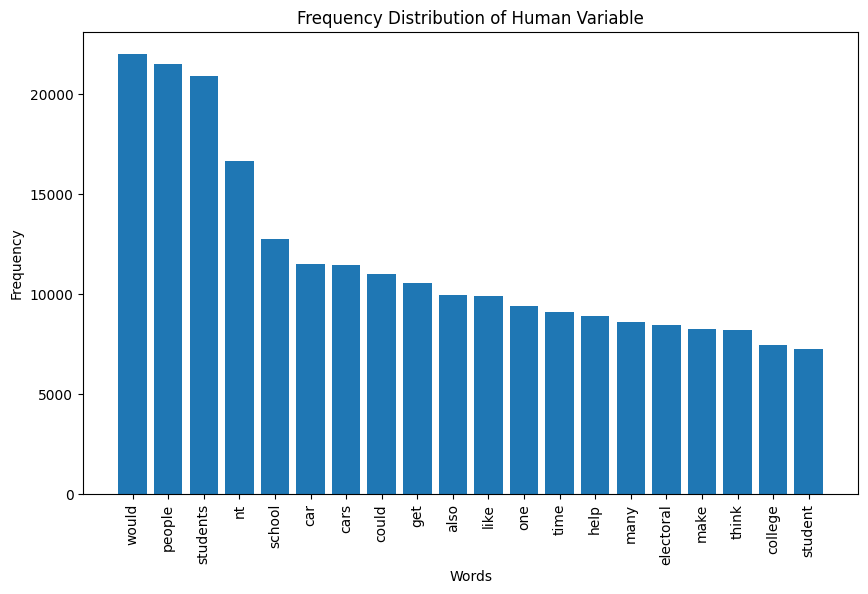

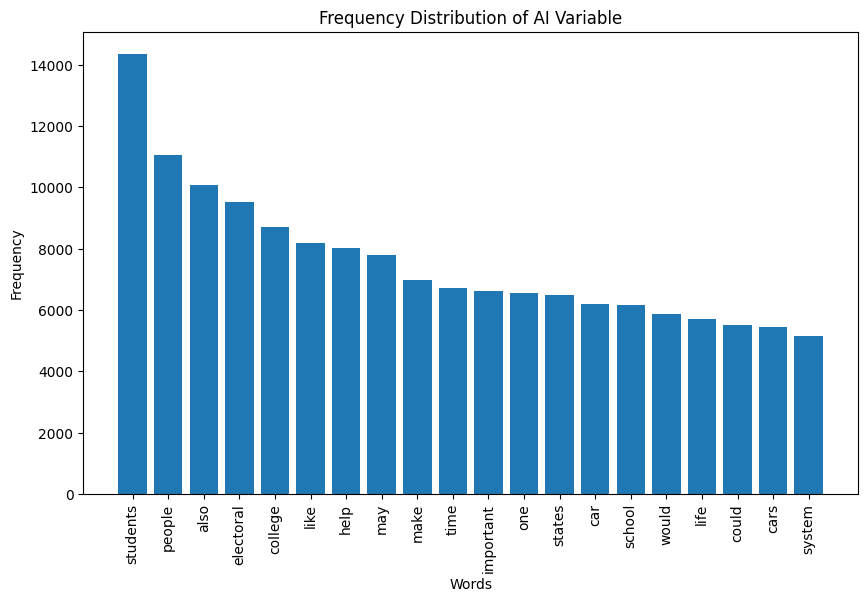

In [14]:


# Plotting the fdist of the human variable

displayWordFreq(fdist_human, 20, True)

displayWordFreq(fdist_ia, 20, False)


In [15]:
#less common words
print("AI")
fdist_ia.most_common()[-20:]


AI


[('lexels', 1),
 ('alevelshier', 1),
 ('perceixe', 1),
 ('liperceiverently', 1),
 ('cultixate', 1),
 ('cultivateattpositive', 1),
 ('uncontrolled', 1),
 ('─', 1),
 ('coincided', 1),
 ('shaded', 1),
 ('rosendhalpassage', 1),
 ('stoopid', 1),
 ('wierd', 1),
 ('touchyfeely', 1),
 ('nays', 1),
 ('dampen', 1),
 ('humbug', 1),
 ('arrivals', 1),
 ('znother', 1),
 ('wellliked', 1)]

In [16]:
#less common words human
print("Human")
fdist_human.most_common()[-20:]


Human


[('dispite', 1),
 ('incapability', 1),
 ('superintendents', 1),
 ('iven', 1),
 ('256', 1),
 ('afficient', 1),
 ('cfdb', 1),
 ('resturaunt', 1),
 ('teoc', 1),
 ('myths', 1),
 ('romeo', 1),
 ('fisher', 1),
 ('swamps', 1),
 ('rabbits', 1),
 ('squares', 1),
 ('blanking', 1),
 ('germinate', 1),
 ('henderson', 1),
 ('meringue', 1),
 ('agruement', 1)]

In [43]:
# # Assuming you have a dictionary called 'my_dict'
# my_dict = {'a': 5, 'b': 3, 'c': 7, 'd': 7, 'e': 2}

# # Get the key with the most occurrences
# most_common_key = max(my_dict, key=my_dict.get)

# print(most_common_key)  # Output: 'c'

list_commons_ia=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]

f_ia = fdist_ia.most_common()
f_human = fdist_human.most_common()
# print(type(f_ia))
# print(f_ia[0][0])

for i in range(len(f_ia)):
    if len(f_ia[i][0]) < 13:
        list_commons_ia[len(f_ia[i][0])] += 1
    else:
        list_commons_ia[13] += 1   
print(list_commons_ia)     


[0, 159, 564, 1962, 2507, 2716, 3167, 3441, 3239, 2853, 2355, 1721, 1210, 2690]


In [44]:
list_commons_human=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]


f_human = fdist_human.most_common()
# print(type(f_ia))
# print(f_ia[0][0])

for i in range(len(f_human)):
    if len(f_human[i][0]) < 13:
        list_commons_human[len(f_human[i][0])] += 1
    else:
        list_commons_human[13] += 1   
print(list_commons_human) 

[0, 33, 594, 2637, 3156, 3552, 3981, 4103, 3647, 3066, 2357, 1474, 950, 1454]


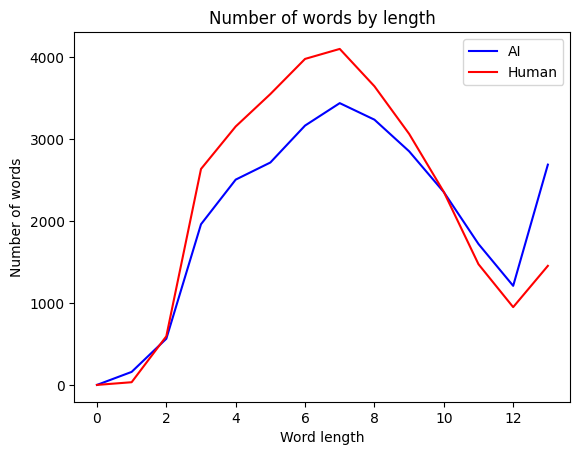

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig= plt.figure()
x=np.arange(14)
y1=list_commons_ia
y2=list_commons_human

plt.errorbar(x, y1, color='b', label='AI')
plt.errorbar(x, y2, color='r', label='Human')

plt.xlabel('Word length')
plt.ylabel('Number of words')

plt.title('Number of words by length')
plt.legend()
plt.show()


## Training in the dataset

In [48]:
import os
import torch
import numpy as np
from matplotlib import style
import seaborn as sns
from textwrap import wrap
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten




In [62]:
#datos = pd.read_csv('archive/AI_Human.csv')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [50]:
import pandas as pd
path_Ruben = '/home/ubuntu/Escritorio/repos/segundo-cuatri/NLP/NLP-practicas_grupo/proyecto-final/archive/AI_Human.csv'
datos = pd.read_csv(path_Ruben)

In [51]:
datos_human = datos[datos['generated'] == 0.0]
datos_ia = datos[datos['generated'] == 1.0]

datos_human=datos_human[:10000]
datos_ia=datos_ia[:10000]

In [52]:
datos = pd.concat([datos_human, datos_ia], ignore_index=True)
datos

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
19995,The use of renewable energy sources is an impo...,1.0
19996,High school sports are often a source of pride...,1.0
19997,The beauty of nature can be seen in the cycle ...,1.0
19998,The impact of air pollution on human health is...,1.0


- 1: Tokenization
- 2: Stopword and Linking word Removal
- 3: Filtering non-Alphabetic Tokens
- 4: Sentiment Analysis

In [53]:
import nltk

porter = PorterStemmer()
stop_words = set(stopwords.words('english'))
linking_words = {'to', 'the', 'and', 'of', 'in', 'on', 'for', 'with', 'at', 'a', 'an'}

sid = SentimentIntensityAnalyzer()



def analyze_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and token not in linking_words]
    tokens = [token for token in tokens if token.isalpha()]

    sentiment_scores = sid.polarity_scores(text)
    return len(tokens), sentiment_scores['compound']

datos_human[['text_length', 'sentiment_score']] = datos_human['text'].apply(lambda x: pd.Series(analyze_text(x)))
datos_ia[['text_length', 'sentiment_score']] = datos_ia['text'].apply(lambda x: pd.Series(analyze_text(x)))

In [54]:
import string
from nltk.tokenize import word_tokenize
def count_punctuation_marks(text):
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    return punctuation_count

def count_linking_words(text):
    linking_words_count = sum(1 for word in word_tokenize(text.lower()) if word in linking_words)
    return linking_words_count

datos_human['punctuation_count'] = datos_human['text'].apply(count_punctuation_marks)
datos_ia['punctuation_count'] = datos_ia['text'].apply(count_punctuation_marks)

datos_human['linking_words_count'] = datos_human['text'].apply(count_linking_words)
datos_ia['linking_words_count'] = datos_ia['text'].apply(count_linking_words)

datos = pd.concat([datos_human, datos_ia], ignore_index=True)
datos


,text,generated,text_length,sentiment_score,punctuation_count,linking_words_count
0,Cars. Cars have been around since they became ...,0.0,329.0,0.9643,75,131
1,Transportation is a large necessity in most co...,0.0,270.0,-0.2426,64,108
2,"""America's love affair with it's vehicles seem...",0.0,437.0,0.9909,101,162
3,How often do you ride in a car? Do you drive a...,0.0,402.0,0.9902,124,133
4,Cars are a wonderful thing. They are perhaps o...,0.0,500.0,-0.9005,110,155
...,...,...,...,...,...,...
19995,The use of renewable energy sources is an impo...,1.0,193.0,0.9910,20,44
19996,High school sports are often a source of pride...,1.0,198.0,0.9969,24,46
19997,The beauty of nature can be seen in the cycle ...,1.0,218.0,0.9961,26,42
19998,The impact of air pollution on human health is...,1.0,235.0,0.7296,26,47


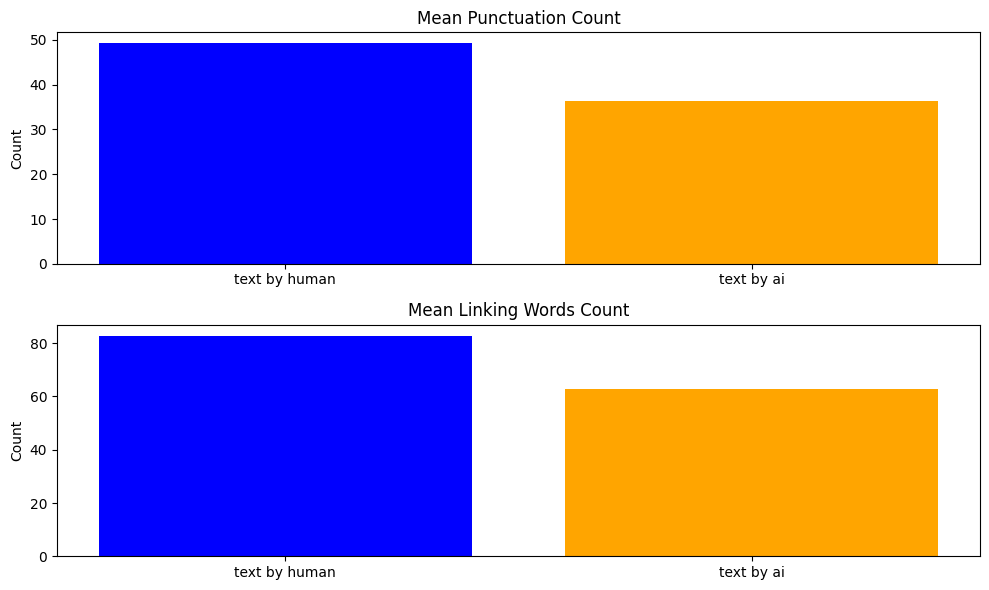

In [55]:
import matplotlib.pyplot as plt

first_mean_punct = datos.iloc[:10000]['punctuation_count'].mean()
first_mean_linking = datos.iloc[:10000]['linking_words_count'].mean()

next_mean_punct = datos.iloc[10000:20000]['punctuation_count'].mean()
next_mean_linking = datos.iloc[10000:20000]['linking_words_count'].mean()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(['text by human', 'text by ai'], [first_mean_punct,next_mean_punct], color=['blue', 'orange'])
plt.title('Mean Punctuation Count')
plt.ylabel('Count')


plt.subplot(2, 1, 2)
plt.bar(['text by human', 'text by ai'], [first_mean_linking, next_mean_linking], color=['blue', 'orange'])
plt.title('Mean Linking Words Count')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [56]:
copia_datos = datos.copy()

copia_datos.drop(['text_length', 'sentiment_score'], axis = 1, inplace = True)
print(copia_datos.head())

copia_datos.fillna(0, inplace = True)

copia_datos

                                                text  generated  \
0  Cars. Cars have been around since they became ...        0.0   
1  Transportation is a large necessity in most co...        0.0   
2  "America's love affair with it's vehicles seem...        0.0   
3  How often do you ride in a car? Do you drive a...        0.0   
4  Cars are a wonderful thing. They are perhaps o...        0.0   

   punctuation_count  linking_words_count  
0                 75                  131  
1                 64                  108  
2                101                  162  
3                124                  133  
4                110                  155  


,text,generated,punctuation_count,linking_words_count
0,Cars. Cars have been around since they became ...,0.0,75,131
1,Transportation is a large necessity in most co...,0.0,64,108
2,"""America's love affair with it's vehicles seem...",0.0,101,162
3,How often do you ride in a car? Do you drive a...,0.0,124,133
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155
...,...,...,...,...
19995,The use of renewable energy sources is an impo...,1.0,20,44
19996,High school sports are often a source of pride...,1.0,24,46
19997,The beauty of nature can be seen in the cycle ...,1.0,26,42
19998,The impact of air pollution on human health is...,1.0,26,47


In [57]:
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.isalpha() and token not in stop_words]

all_words = [word for text in copia_datos['text'] for word in tokenize_text(text)]
word_count = Counter(all_words)

top_words = [word for word, _ in word_count.most_common(500)]

def create_word_features(text):
    tokens = tokenize_text(text)
    return [1 if word in tokens else 0 for word in top_words]

def lengthText(text):
    tokens = word_tokenize(text.lower())
    return len(tokens)

copia_datos['text_length'] = copia_datos['text'].apply(lengthText)

copia_datos['word_features'] = copia_datos['text'].apply(create_word_features)
copia_datos

,text,generated,punctuation_count,linking_words_count,text_length,word_features
0,Cars. Cars have been around since they became ...,0.0,75,131,657,"[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, ..."
1,Transportation is a large necessity in most co...,0.0,64,108,526,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ..."
2,"""America's love affair with it's vehicles seem...",0.0,101,162,842,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, ..."
3,How often do you ride in a car? Do you drive a...,0.0,124,133,805,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ..."
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155,967,"[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ..."
...,...,...,...,...,...,...
19995,The use of renewable energy sources is an impo...,1.0,20,44,316,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19996,High school sports are often a source of pride...,1.0,24,46,349,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ..."
19997,The beauty of nature can be seen in the cycle ...,1.0,26,42,355,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ..."
19998,The impact of air pollution on human health is...,1.0,26,47,377,"[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."


In [58]:
def calculate_punctuation_count(text):
    return count_punctuation_marks(text)/ len(word_tokenize(text)) * 100

copia_datos['punctuation_count_percentage'] = copia_datos['text'].apply(calculate_punctuation_count)

def calculate_linking_words_count(text):
    return count_linking_words(text)/ len(word_tokenize(text)) * 100

copia_datos['linking_words_percentage'] = copia_datos['text'].apply(calculate_linking_words_count)

copia_datos

,text,generated,punctuation_count,linking_words_count,text_length,word_features,punctuation_count_percentage,linking_words_percentage
0,Cars. Cars have been around since they became ...,0.0,75,131,657,"[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...",11.398176,19.908815
1,Transportation is a large necessity in most co...,0.0,64,108,526,"[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...",12.167300,20.532319
2,"""America's love affair with it's vehicles seem...",0.0,101,162,842,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, ...",11.995249,19.239905
3,How often do you ride in a car? Do you drive a...,0.0,124,133,805,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ...",15.403727,16.521739
4,Cars are a wonderful thing. They are perhaps o...,0.0,110,155,967,"[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, ...",11.351909,15.995872
...,...,...,...,...,...,...,...,...
19995,The use of renewable energy sources is an impo...,1.0,20,44,316,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.329114,13.924051
19996,High school sports are often a source of pride...,1.0,24,46,349,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ...",6.876791,13.180516
19997,The beauty of nature can be seen in the cycle ...,1.0,26,42,355,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",7.323944,11.830986
19998,The impact of air pollution on human health is...,1.0,26,47,377,"[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",6.896552,12.466844


### Modeling Logistic Regression with cnn

- 1: Feature Engineering: It creates a DataFrame X containing various features extracted from copia_datos DataFrame. this features include word features, punctuation count percentage, count of synonyms, linking words percentage, and the length of the text. It also assigns the target variable y from the 'generated' column of copia_datos

- 2: Data Splitting: It splits the data into training and testing setns using the train_test_split function from scikit-learn. The testing set size is set to 30%of the total data, and a random state of 42 is user for reproducibility

- 3: Data Imputation

- 4: Model Training

- 5: Prediction and Evaluation

- 6: Visualization

Accuracy:  0.991
Train loss:  0.013392573645597835
Test loss:  0.02829865089839938
classification report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3017
         1.0       0.99      0.99      0.99      2983

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

class wise metrics: 
              precision    recall  f1-score   support
0.0            0.991376  0.990719  0.991048  3017.000
1.0            0.990620  0.991284  0.990952  2983.000
accuracy       0.991000  0.991000  0.991000     0.991
macro avg      0.990998  0.991002  0.991000  6000.000
weighted avg   0.991000  0.991000  0.991000  6000.000


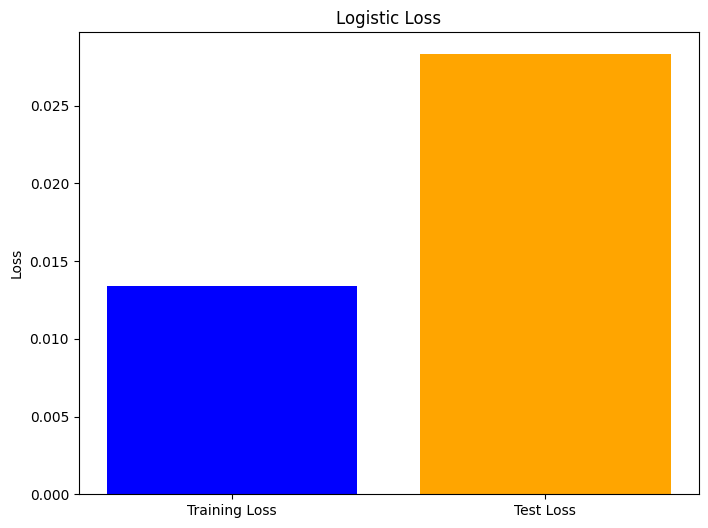

In [59]:
X = pd.DataFrame(copia_datos['word_features'].tolist(), columns=top_words)
X['punctuation_count_percentage'] = copia_datos['punctuation_count_percentage']
X['linking_words_percentage'] = copia_datos['linking_words_percentage']
X['text_length'] = copia_datos['text_length']
y = copia_datos['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer =SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)
train_loss = log_loss(y_train, model.predict_proba(X_train_imputed))

test_loss = log_loss(y_test, model.predict_proba(X_test_imputed))

print("Train loss: ", train_loss)
print("Test loss: ", test_loss)

class_report =classification_report(y_test, y_pred)
print("classification report: ")
print(class_report)

class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T #FIXME puede ser que vaya mal
print("class wise metrics: ")
print(class_report_df)

loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Test Loss']

plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['blue', 'orange'])
plt.title('Logistic Loss')
plt.ylabel('Loss')
plt.show()

### Error calculation

/home/ubuntu/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9275 - loss: 0.1671 - val_accuracy: 0.9838 - val_loss: 0.0451
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9839 - loss: 0.0468 - val_accuracy: 0.9853 - val_loss: 0.0433
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9893 - loss: 0.0287 - val_accuracy: 0.9918 - val_loss: 0.0267
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9955 - loss: 0.0150 - val_accuracy: 0.9927 - val_loss: 0.0231
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.9927 - val_loss: 0.0246
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9970 - loss: 0.0083 - val_accuracy: 0.9940 - val_loss: 0.0216
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9975 - loss: 0.0057 - val_accuracy: 0.9917 - val_loss: 0.0254
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9980 - loss: 0.0059 - 

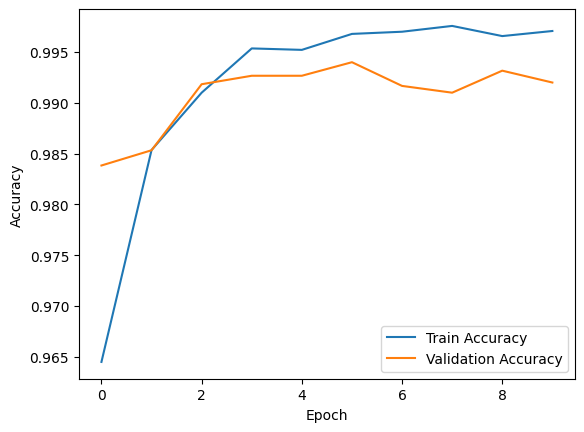

In [60]:
X = pd.DataFrame(copia_datos['word_features'].tolist(), columns=top_words)
X['punctuation_count_percentage'] = copia_datos['punctuation_count_percentage']
X['linking_words_percentage'] = copia_datos['linking_words_percentage']
X['text_length'] = copia_datos['text_length']
y = copia_datos['generated']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

imputer =SimpleImputer(strategy='constant', fill_value=0)

X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)

X_train_cnn = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_valid_cnn = X_valid_imputed.reshape(X_valid_imputed.shape[0], X_valid_imputed.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_valid_cnn, y_valid))

y_train_pred_probs = model.predict(X_train_cnn)
y_valid_pred_probs = model.predict(X_valid_cnn)

y_train_pred = (y_train_pred_probs > 0.5).astype(int)
y_valid_pred = (y_valid_pred_probs > 0.5).astype(int)

train_error = 1 - accuracy_score(y_train, y_train_pred)

validation_error = 1 - accuracy_score(y_valid, y_valid_pred)

print("Train error: ", train_error)
print("Validation error: ", validation_error)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

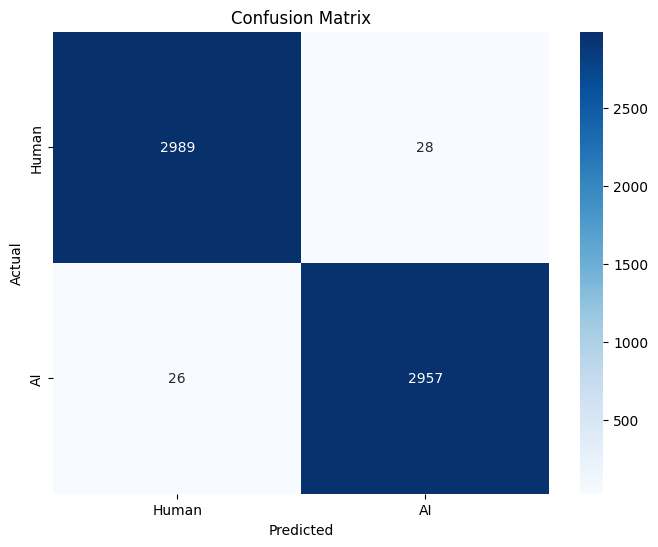

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()